# K-Means Clustering

Your assignment is to use the TMDB 5000 dataset from Kaggle to try and cluster similar movies. 

It may be helpful to use PCA to reduce the dimensions of your data first - but then again maybe not. I dunno, you're the data scientist, you tell me. 🤪 

I'll let you download the dataset and get it into your notebook in the way that works best for you:

<https://www.kaggle.com/tmdb/tmdb-movie-metadata/version/2>

There are a few weird data cleaning steps that you'll need to do that I don't want you to get stuck on or spend a lot of time on so I'll try and help you out a little bit. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/tmdb_5000_movies.csv")
print(df.shape)

(4803, 20)


In [3]:
# There's probably some pandas function that will do this but...
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)  

In [4]:
# Filter the dataframe by only the numeric columns
df_numeric = df[num_list]
df_numeric.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [8]:
# lazily fill NaNs with zeros
movie_num = df_numeric.fillna(value=0, axis=1)

# You take it from here!

See what you can come up with. You have all the know-how! 

In [ ]:
# First, let's get rid of the 'id' column, 
# which should be nothing but noise
movie_num.drop(columns='id', inplace=True)

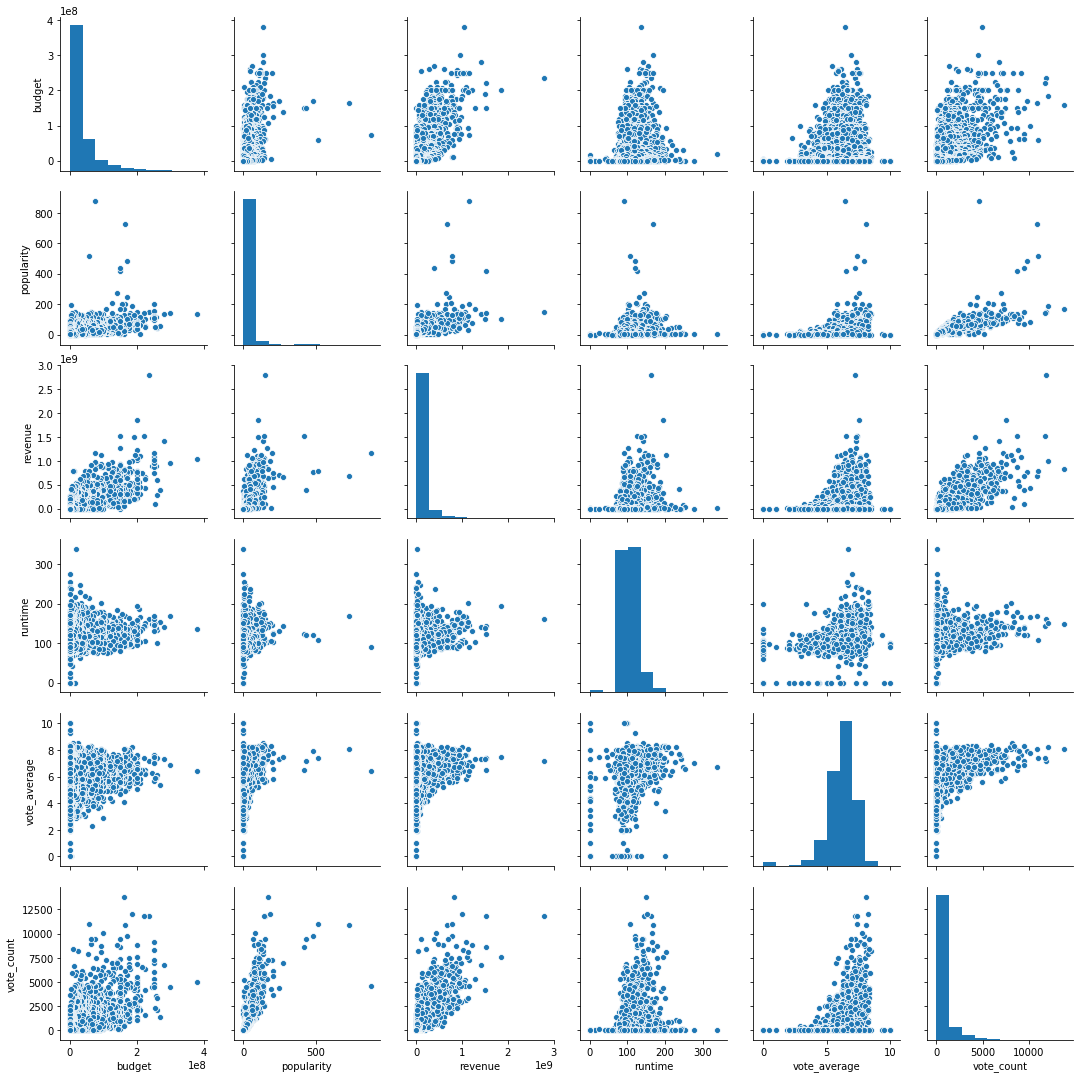

In [36]:
import seaborn as sns
sns.pairplot(movie_num);

In [47]:
# I bet that several of these features are heavily correlated, and thus
# that PCA would help reduce them in a useful way.

# Let's retain all the components, to see what happens
pca = PCA()

# Fit to our X values
pca.fit(movie_num)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)

print("\n Eigenvalues: \n", pca.explained_variance_)

print("\n % variance explained: \n", 
      ['{:.1%}'.format(x) for x in pca.explained_variance_ratio_])

# transform data
movie_transformed = pd.DataFrame(pca.transform(movie_num), 
                columns=['PC1','PC2','PC3','PC4','PC5','PC6'])


 Eigenvectors: 
 [[ 1.84799048e-01  1.24086053e-07  9.82776329e-01  3.49267235e-08
   1.40456006e-09  5.82972323e-06]
 [-9.82776329e-01 -3.50856048e-08  1.84799048e-01 -9.84969552e-08
   3.52751372e-09 -3.63888028e-07]
 [-1.43609305e-06  1.81087347e-02 -5.66325278e-06  3.39465790e-03
   4.02138070e-04  9.99830180e-01]
 [-1.00297299e-07  7.16791667e-02  2.17120323e-09  9.97255163e-01
   1.79506883e-02 -4.69137448e-03]
 [-2.42648590e-08  9.97257694e-01 -1.31014830e-08 -7.18003813e-02
   2.06699436e-03 -1.78191946e-02]
 [-5.63618483e-09  3.35584678e-03 -2.33304199e-10  1.77572713e-02
  -9.99836656e-01  2.81070114e-04]]

 Eigenvalues: 
 [2.74338104e+16 7.46938100e+14 5.91947805e+05 4.68843804e+02
 3.94608963e+02 1.11556006e+00]

 % variance explained: 
 ['97.3%', '2.7%', '0.0%', '0.0%', '0.0%', '0.0%']


Bingo.  Looks like basically all the variance is explained by the first two PCs.  So let's plot the data based on these and get rid of all the others.

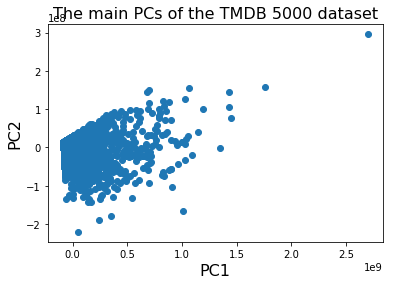

In [32]:
# Plotting datapoints based only on the two top PCs.
fig, ax = plt.subplots()
ax.scatter(movie_transformed['PC1'], movie_transformed['PC2'])
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('The main PCs of the TMDB 5000 dataset', fontsize=16)
plt.show()

Something doesn't seem right.  I suspect that my first two principal components don't actually explain THAT much of the variance, but are fooled by the fact that some of the variables have way larger numbers than others (e.g., revenue in dollars vs. average critic score).  Let's scale the data and try again, both with a standard scaler and a scaler that is robust to outliers.

## Scaling the dataset

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# I don't *have* to turn it into a DataFrame, but it's 
# so much easier to read it this way
movie_scaled_std = pd.DataFrame(scaler.fit_transform(movie_num),
                               columns=movie_num.columns);

/anaconda3/envs/sandbox/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/sandbox/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
# And now we can run the same PCA again
pca = PCA()

# Fit to our X values
pca.fit(movie_scaled_std)

# access values and vectors
print("\n Eigenvalues: \n", pca.explained_variance_)
print("\n % variance explained: \n", 
      ['{:.1%}'.format(x) for x in pca.explained_variance_ratio_])

# transform data
movie_transformed_std = pd.DataFrame(pca.transform(movie_scaled_std),
                    columns=['PC1','PC2','PC3','PC4','PC5','PC6'])


 Eigenvalues: 
 [3.26606119 1.1505074  0.71277677 0.4539714  0.25797091 0.1599618 ]

 % variance explained: 
 ['54.4%', '19.2%', '11.9%', '7.6%', '4.3%', '2.7%']


A-hA!  The PCs are much less skewed now, showing the importance of standardizing the data before using PCA.  Now, what happens if I use RobustScaling instead?

In [53]:
# And now with Robust scaling

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

movie_scaled_robust = pd.DataFrame(scaler.fit_transform(movie_num),
                               columns=movie_num.columns);
pca = PCA()
pca.fit(movie_scaled_robust)
print("\n Eigenvalues: \n", pca.explained_variance_)
print("\n % variance explained: \n", 
      ['{:.1%}'.format(x) for x in pca.explained_variance_ratio_])

# transform data
movie_transformed_robust = pd.DataFrame(pca.transform(movie_scaled_robust),
                    columns=['PC1','PC2','PC3','PC4','PC5','PC6'])


 Eigenvalues: 
 [7.5442536  1.21863481 0.95769213 0.58900109 0.47489394 0.36922724]

 % variance explained: 
 ['67.6%', '10.9%', '8.6%', '5.3%', '4.3%', '3.3%']


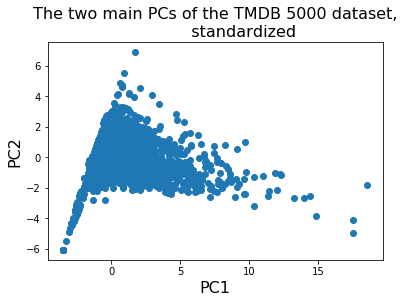

In [61]:
# Plotting datapoints based only on the two top PCs of the 
# scaled dataset.
fig, ax = plt.subplots()
ax.scatter(movie_transformed_std['PC1'], 
           movie_transformed_std['PC2'])
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('The two main PCs of the TMDB 5000 dataset,\n \
          standardized', fontsize=16)
plt.show()

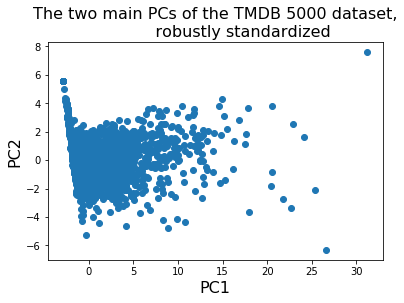

In [59]:
# Plotting datapoints based only on the two top PCs of the 
# robustly scaled dataset.
fig, ax = plt.subplots()
ax.scatter(movie_transformed_robust['PC1'], 
           movie_transformed_robust['PC2'])
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('The two main PCs of the TMDB 5000 dataset,\n \
          robustly standardized', fontsize=16)
plt.show()

I choose to move forward with data that was preprocessed with the robust scaler. The plot of PC1 vs PC2 looks a bit tighter for the robust scaling.  Also, when looking at the pairplot of the non-scaled data there are a few points that look like outliers to me.

## Clustering
First, let's search for pairplot patterns that suggest obvious clusters.

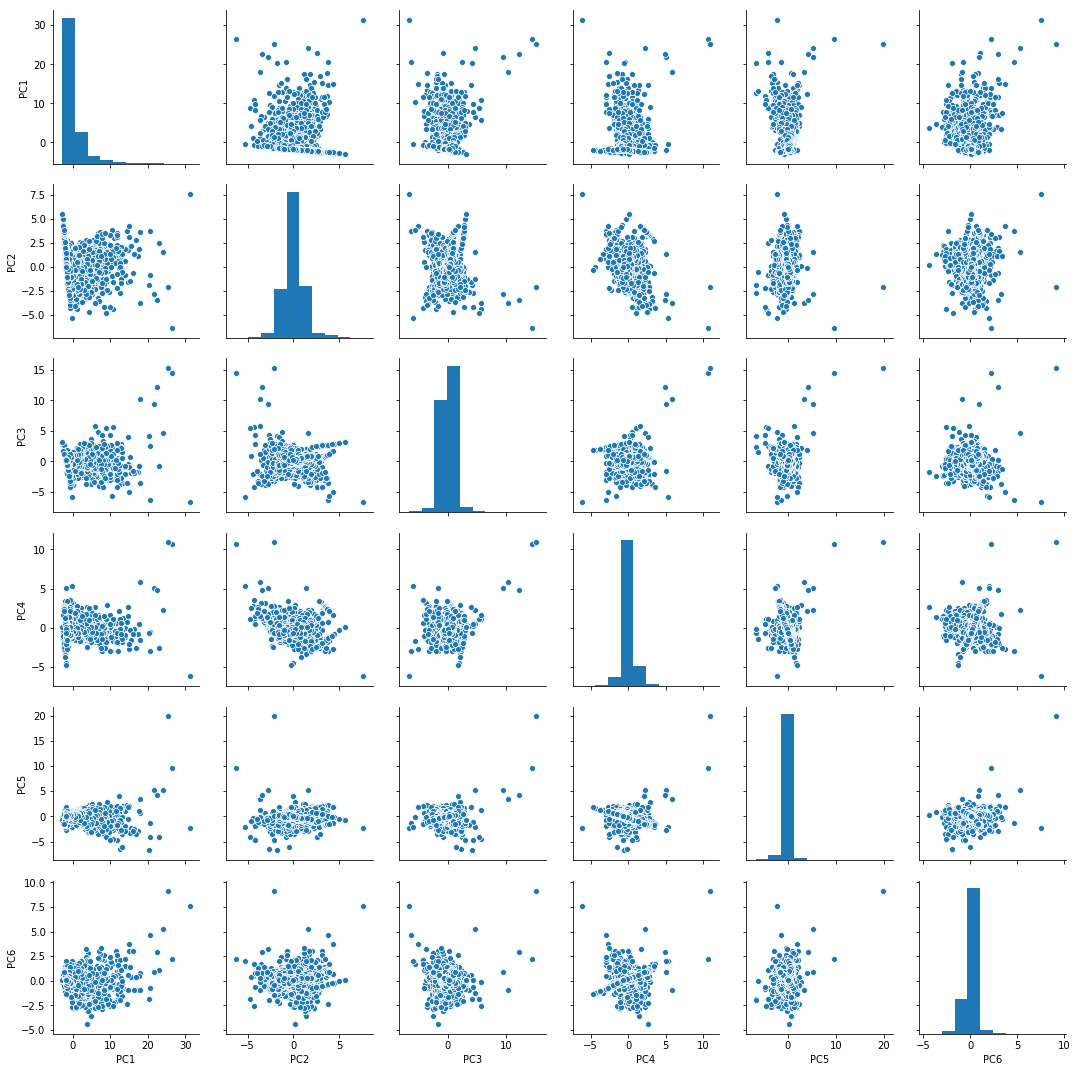

In [52]:
sns.pairplot(movie_transformed_robust);

Crap, no obvious patterns. Alright, let's cluster anyway.

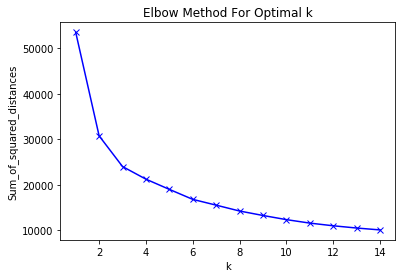

In [64]:
# Let's make an elbow plot to choose a K for KM Clustering. This code
# runs on the whole dataset, including all 6 PCs.
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(movie_transformed_robust)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

I'd go with k=3 and call it a day.

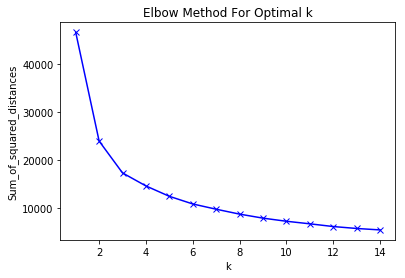

In [65]:
# And now the same, but only considering the top 3 PCs.
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(movie_transformed_robust[['PC1','PC2','PC3']])
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Looks exactly the same to me, so I'll also go with k=3 in this case. In fact, for my final clustering I choose to use only the first 3 PCs, and cluster with k=3.  What does that look like, graphically?

In [75]:
# Cluster based on the first 3 PCs only.
km = KMeans(n_clusters=3)
km = km.fit(movie_transformed_robust[['PC1','PC2','PC3']])

# Make new dataframe with all the data we care about
movies_final = movie_transformed_robust[['PC1','PC2','PC3']].copy()
movies_final['title'] = df['title']
movies_final = movies_final[['title','PC1','PC2','PC3']]
movies_final['cluster'] = km.labels_
movies_final.head()

,title,PC1,PC2,PC3,cluster
0,Avatar,31.234861,7.578288,-6.613553,0
1,Pirates of the Caribbean: At World's End,13.346064,2.020476,-3.470168,0
2,Spectre,11.706601,2.353984,-2.716381,0
3,The Dark Knight Rises,17.543945,1.136586,-1.725955,0
4,John Carter,4.730862,1.368554,-2.424218,2


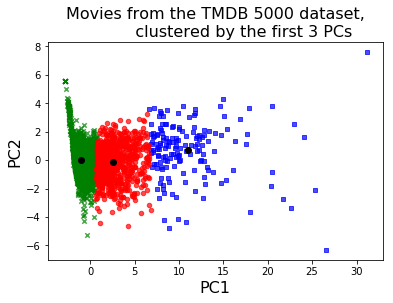

In [100]:
from mlxtend.plotting import category_scatter

centroids = movies_final.groupby('cluster').mean()

fig = category_scatter(data=movies_final,
                       x = 'PC1', 
                       y = 'PC2', 
                       label_col = 'cluster', legend_loc=False)

for cent in centroids.iterrows():
    plt.plot(cent[1][0], cent[1][1], "ok")

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('Movies from the TMDB 5000 dataset,\n \
          clustered by the first 3 PCs', fontsize=16)

plt.show()

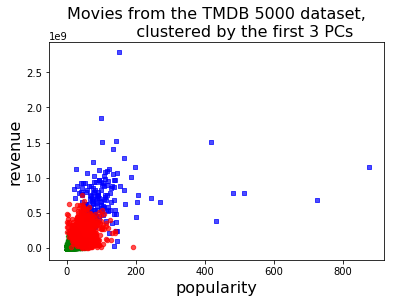

In [111]:
# What does that data look, transformed back into 
# variables that humans understand?

movies_human = movie_num.copy()
movies_human['cluster'] = movies_final['cluster']

fig = category_scatter(data=movies_human,
                       x = 'popularity', 
                       y = 'revenue', 
                       label_col = 'cluster', legend_loc=False)

plt.xlabel('popularity', fontsize=16)
plt.ylabel('revenue', fontsize=16)
plt.title('Movies from the TMDB 5000 dataset,\n \
          clustered by the first 3 PCs', fontsize=16)

plt.show()

# Stretch Goal:

If you look at the original dataset you'll notice that I threw away some potentially useful columns. See if there are any that you could clean more effectively and turn into a numeric representation (probably some kind of one-hot-encoding of categorical variables) to assist your clustering. There's a lot more work here than the hours we have today however, so don't kill yourself trying to incorporate every single column from the original dataset, just take it one column at a time.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [109]:
movies_human.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,cluster
0,237000000,150.437577,2787965087,162.0,7.2,11800,0
1,300000000,139.082615,961000000,169.0,6.9,4500,0
2,245000000,107.376788,880674609,148.0,6.3,4466,0
3,250000000,112.312950,1084939099,165.0,7.6,9106,0
4,260000000,43.926995,284139100,132.0,6.1,2124,2
